**This notebook is an exercise in the [Data Visualization](https://www.kaggle.com/learn/data-visualization) course.  You can reference the tutorial at [this link](https://www.kaggle.com/alexisbcook/final-project).**

---


In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

my_filepath = "Activities.csv"

In [3]:
my_data = pd.read_csv(my_filepath, index_col="日期", parse_dates=True)

In [4]:
my_data.head()

,活动类型,我的最爱,标题,距离,热量消耗,时间,平均心率,最大心率,有氧 TE,平均速度,最大速度,总攀爬高度,累计下降,平均步长,平均垂直比,平均垂直摆动,平均触地时间,平均坡度校正配速,平均踏频,最高踏频,Normalized Power® (NP®),左/右平衡,Training Stress Score®,最大平均功率（20 分钟）,平均功率,最大功率,Grit,Flow,总踩踏圈数,平均 Swolf,平均划桨率,总次数,潜水时长,最低温度,水面休息时间,减压,最佳单圈时间,圈数,最高温度,移动时间,全程用时,最低海拔,最高海拔
日期,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-11-15 14:18:49,公路骑行,False,成都市 公路骑行,32.18,844,01:10:17,132,152,3.2,27.5,45.6,191,187,0.0,0.0,0.0,0,--,71,102,183,37% 左 / 63% 右,74.6,189,178,504,0.0,0.0,4916,0,0,0,0:00,0.0,0:00,否,01:10:16.59,1,0.0,01:10:09,01:10:17,461,492
2023-11-11 13:46:51,公路骑行,False,成都市 公路骑行,48.61,"1,177",01:53:32,131,160,3.3,25.7,44.3,311,309,0.0,0.0,0.0,0,--,66,110,154,36% 左 / 64% 右,86.4,157,151,458,0.0,0.0,7379,0,0,0,0:00,0.0,0:00,否,01:53:32.48,1,0.0,01:53:27,01:54:28,462,494
2023-11-10 14:16:11,公路骑行,False,成都市 公路骑行,32.20,746,01:12:28,128,144,2.8,26.7,44.8,233,232,0.0,0.0,0.0,0,--,64,104,153,38% 左 / 62% 右,53.7,156,150,407,0.0,0.0,4616,0,0,0,0:00,0.0,0:00,否,01:12:27.51,1,0.0,01:12:21,01:12:28,462,496
2023-11-09 14:11:56,公路骑行,False,成都市 公路骑行,80.83,"1,823",03:05:51,131,152,3.6,26.1,42.6,516,511,0.0,0.0,0.0,0,--,65,103,145,37% 左 / 63% 右,125.8,152,142,383,0.0,0.0,11700,0,0,0,0:00,0.0,0:00,否,03:05:50.53,1,0.0,03:05:28,03:06:31,462,493
2023-11-08 15:15:29,公路骑行,False,成都市 公路骑行,55.51,"1,204",02:02:20,127,144,3.2,27.2,47.9,413,417,0.0,0.0,0.0,0,--,67,123,147,36% 左 / 64% 右,84.1,149,142,341,0.0,0.0,7980,0,0,0,0:00,0.0,0:00,否,02:02:19.52,1,0.0,02:02:01,02:02:20,458,502


In [5]:
columns = [
    "距离",
    "热量消耗",
    "时间",
    "平均心率",
    "最大心率",
    "平均速度",
    "总攀爬高度",
    "平均踏频",
    "Normalized Power® (NP®)",
    "左/右平衡",
    "最大平均功率（20 分钟）",
    "平均功率",
    "最大功率",
]
df = my_data[columns]

df = df.rename(
    columns={
        "距离": "distance",
        "热量消耗": "calories",
        "时间": "duration",
        "平均心率": "avghr",
        "最大心率": "maxhr",
        "平均速度": "avs",
        "总攀爬高度": "totalclimb",
        "平均踏频": "avgcadence",
        "Normalized Power® (NP®)": "normalizedpower",
        "左/右平衡": "balance",
        "最大平均功率（20 分钟）": "maxpr20",
        "平均功率": "avgpr",
        "最大功率": "maxpr",
    }
)

df.head()

,distance,calories,duration,avghr,maxhr,avs,totalclimb,avgcadence,normalizedpower,balance,maxpr20,avgpr,maxpr
日期,,,,,,,,,,,,,
2023-11-15 14:18:49,32.18,844,01:10:17,132,152,27.5,191,71,183,37% 左 / 63% 右,189,178,504
2023-11-11 13:46:51,48.61,"1,177",01:53:32,131,160,25.7,311,66,154,36% 左 / 64% 右,157,151,458
2023-11-10 14:16:11,32.20,746,01:12:28,128,144,26.7,233,64,153,38% 左 / 62% 右,156,150,407
2023-11-09 14:11:56,80.83,"1,823",03:05:51,131,152,26.1,516,65,145,37% 左 / 63% 右,152,142,383
2023-11-08 15:15:29,55.51,"1,204",02:02:20,127,144,27.2,413,67,147,36% 左 / 64% 右,149,142,341


In [6]:
df["date"] = df.index.date
df["time"] = df.index.time


def rough_time(timestamp):
    if timestamp.hour < 10:
        return "morning"
    elif timestamp.hour < 18:
        return "afternoon"
    else:
        return "evening"


def extract_hour(timestamp):
    return timestamp.hour


df["hour"] = df["time"].apply(extract_hour)
df["time"] = df["time"].apply(rough_time)
df.index = df["date"]
df.head()

,distance,calories,duration,avghr,maxhr,avs,totalclimb,avgcadence,normalizedpower,balance,maxpr20,avgpr,maxpr,date,time,hour
date,,,,,,,,,,,,,,,,
2023-11-15,32.18,844,01:10:17,132,152,27.5,191,71,183,37% 左 / 63% 右,189,178,504,2023-11-15,afternoon,14
2023-11-11,48.61,"1,177",01:53:32,131,160,25.7,311,66,154,36% 左 / 64% 右,157,151,458,2023-11-11,afternoon,13
2023-11-10,32.20,746,01:12:28,128,144,26.7,233,64,153,38% 左 / 62% 右,156,150,407,2023-11-10,afternoon,14
2023-11-09,80.83,"1,823",03:05:51,131,152,26.1,516,65,145,37% 左 / 63% 右,152,142,383,2023-11-09,afternoon,14
2023-11-08,55.51,"1,204",02:02:20,127,144,27.2,413,67,147,36% 左 / 64% 右,149,142,341,2023-11-08,afternoon,15


<Axes: xlabel='date', ylabel='avs'>

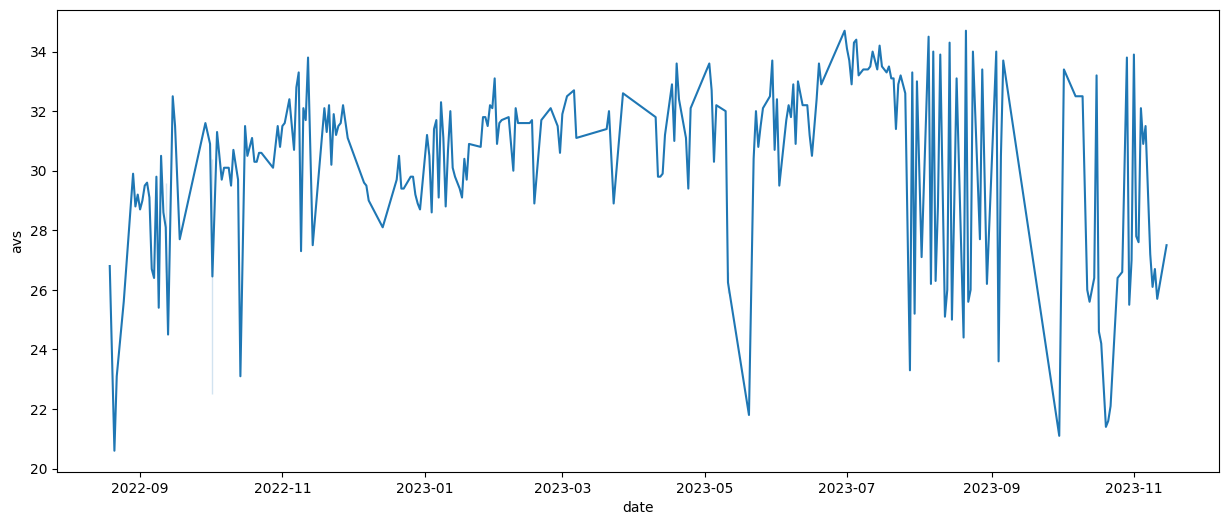

In [8]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=df["avs"])

<Axes: xlabel='date', ylabel='avgpr'>

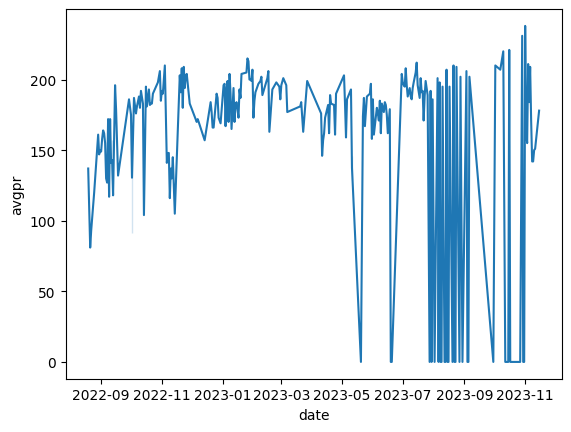

In [9]:
sns.lineplot(data=df["avgpr"])

<Axes: xlabel='avgpr', ylabel='Count'>

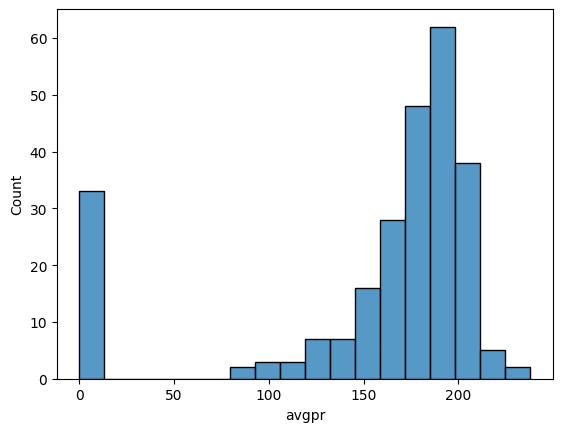

In [10]:
sns.histplot(df["avgpr"])

<Axes: xlabel='avs', ylabel='Count'>

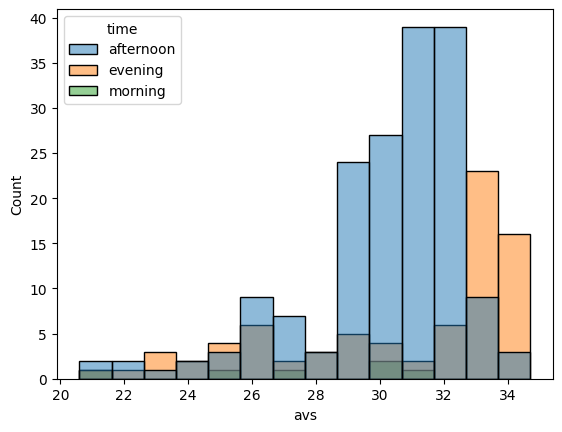

In [11]:
sns.histplot(data=df, x="avs", hue="time")

<Axes: xlabel='avs', ylabel='Density'>

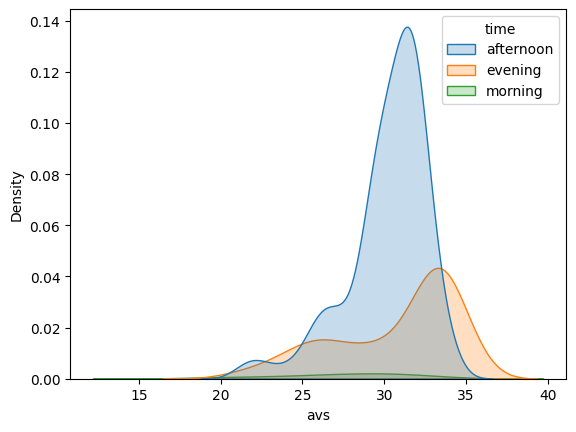

In [12]:
sns.kdeplot(data=df, x="avs", hue="time", fill=True)

Text(0, 0.5, 'avs')

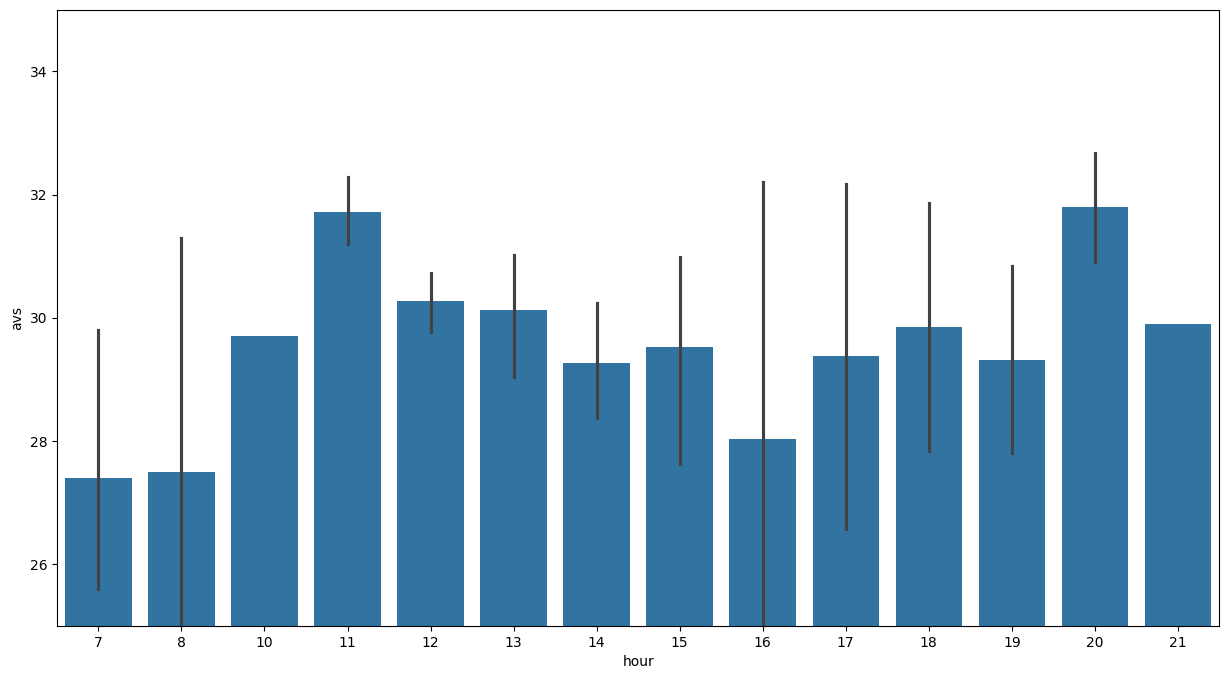

In [13]:
fig, ax = plt.subplots(figsize=(15, 8))

sns.barplot(x=df["hour"], y=df["avs"], ax=ax)

ax.set_ylim(25, 35)

plt.ylabel("avs")

In [14]:
def rough_speed(speed):
    if speed < 27:
        return "<27"
    elif speed < 30:
        return "27-30"
    elif speed < 33:
        return "30-33"
    else:
        return "33+"


df["spdseg"] = df["avs"].apply(rough_speed)

In [15]:
new_df = df[df["avgpr"] != 0]

<Axes: xlabel='avs', ylabel='avgpr'>

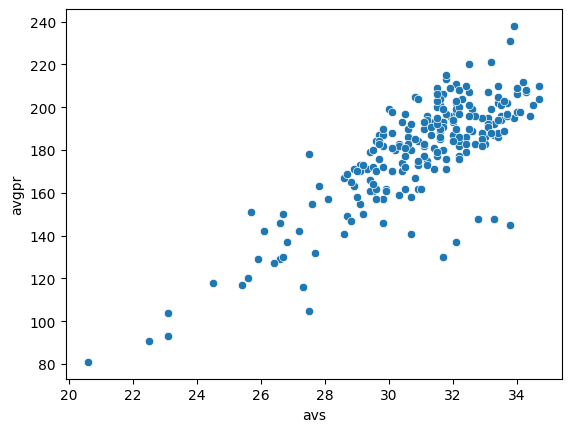

In [16]:
sns.scatterplot(data=new_df, x="avs", y="avgpr")

<Axes: xlabel='avs', ylabel='avgpr'>

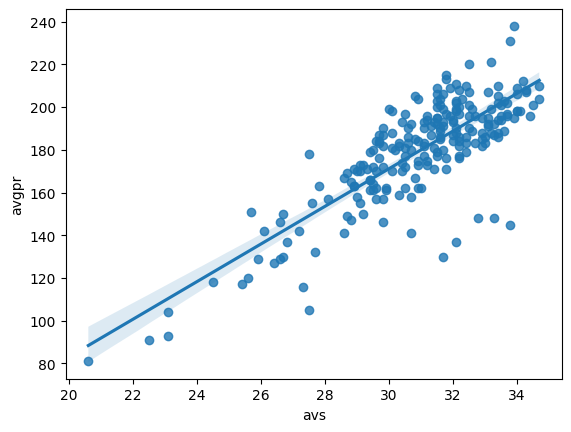

In [17]:
sns.regplot(data=new_df, x="avs", y="avgpr")

<Axes: xlabel='avs', ylabel='avgpr'>

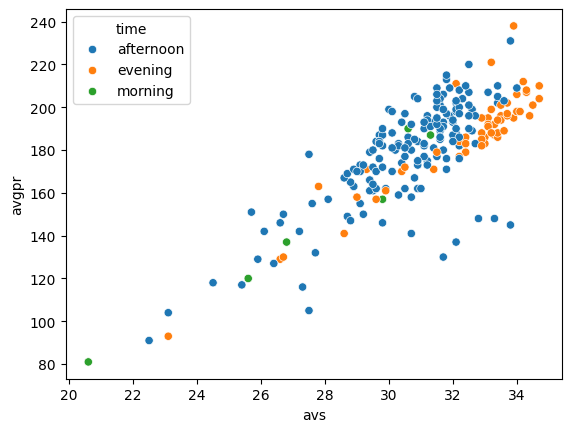

In [18]:
sns.scatterplot(data=new_df, x="avs", y="avgpr", hue="time")

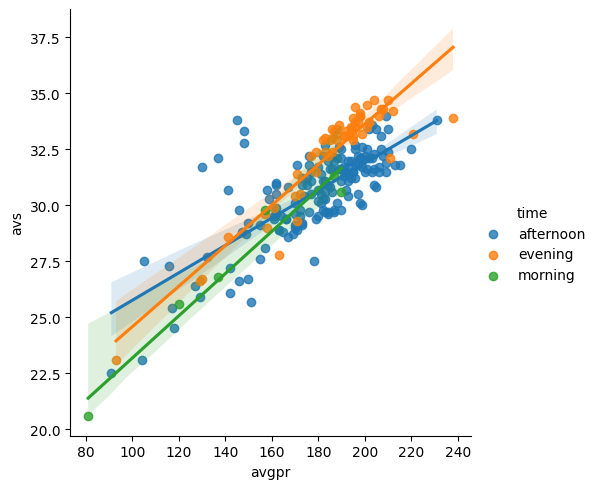

In [19]:
sns.lmplot(x="avgpr", y="avs", hue="time", data=new_df)

<Axes: xlabel='spdseg', ylabel='Count'>

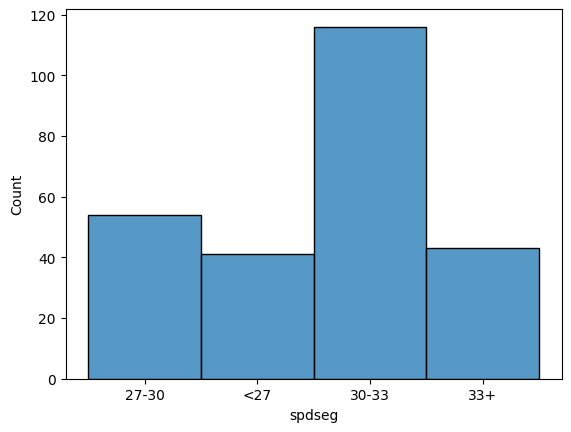

In [20]:
sns.histplot(df["spdseg"])

<Figure size 1600x800 with 0 Axes>

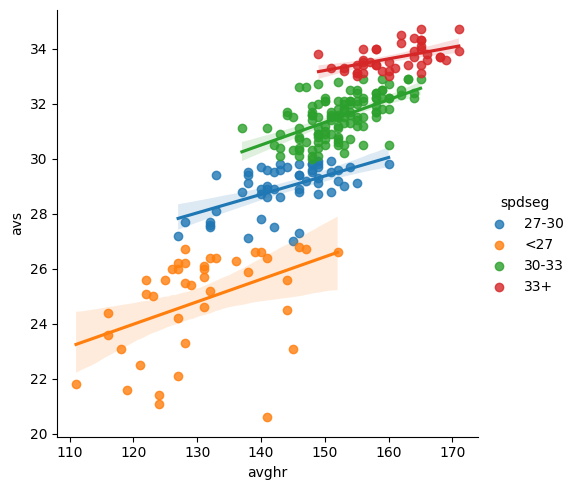

In [21]:
plt.figure(figsize=(16, 8))
sns.lmplot(x="avghr", y="avs", hue="spdseg", data=df)

<Figure size 1600x800 with 0 Axes>

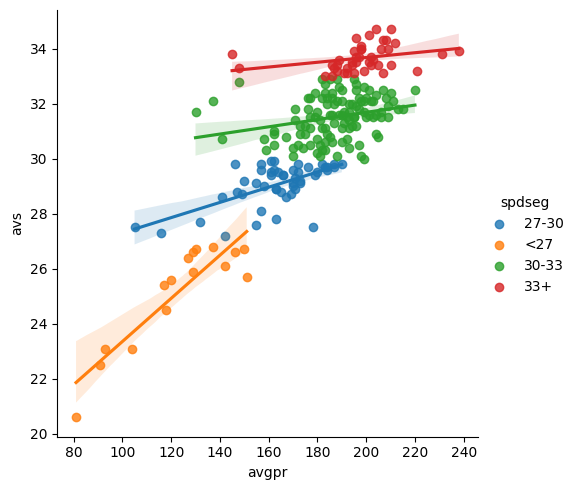

In [22]:
plt.figure(figsize=(16, 8))
sns.lmplot(x="avgpr", y="avs", hue="spdseg", data=new_df)

<Axes: xlabel='time', ylabel='avs'>

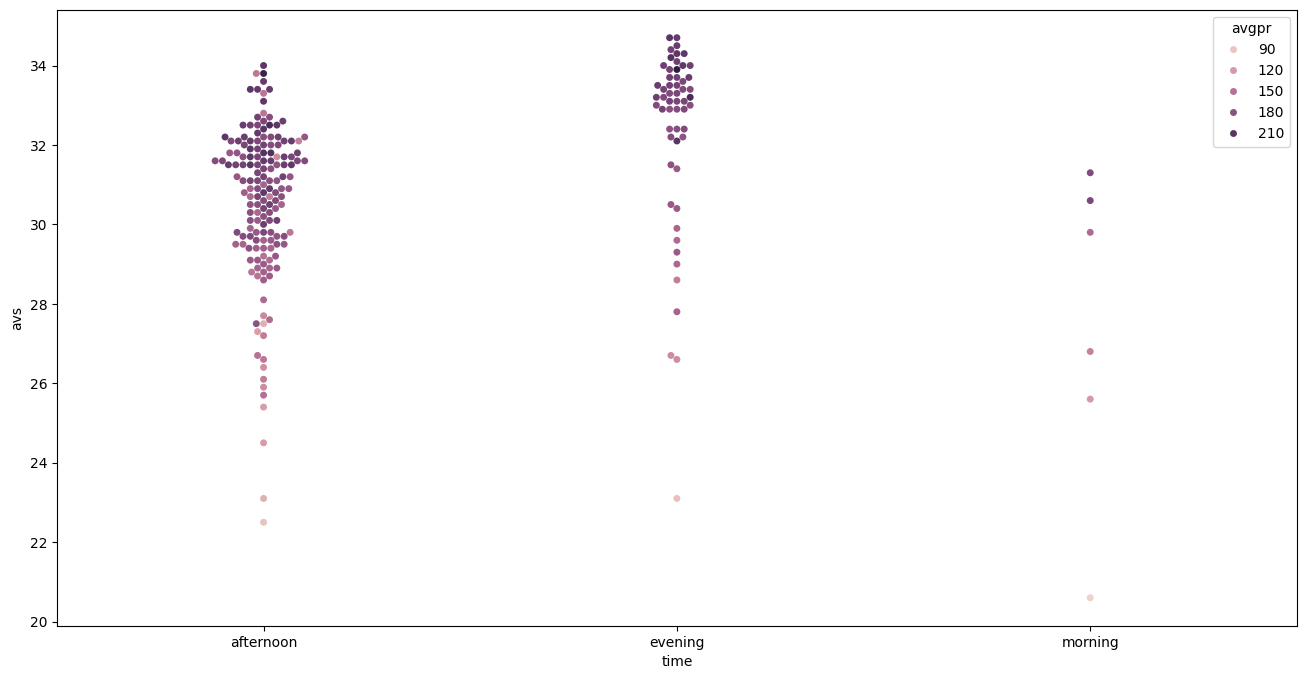

In [23]:
plt.figure(figsize=(16, 8))
sns.swarmplot(data=new_df, hue="avgpr", x="time", y="avs")

<Axes: xlabel='time', ylabel='avs'>

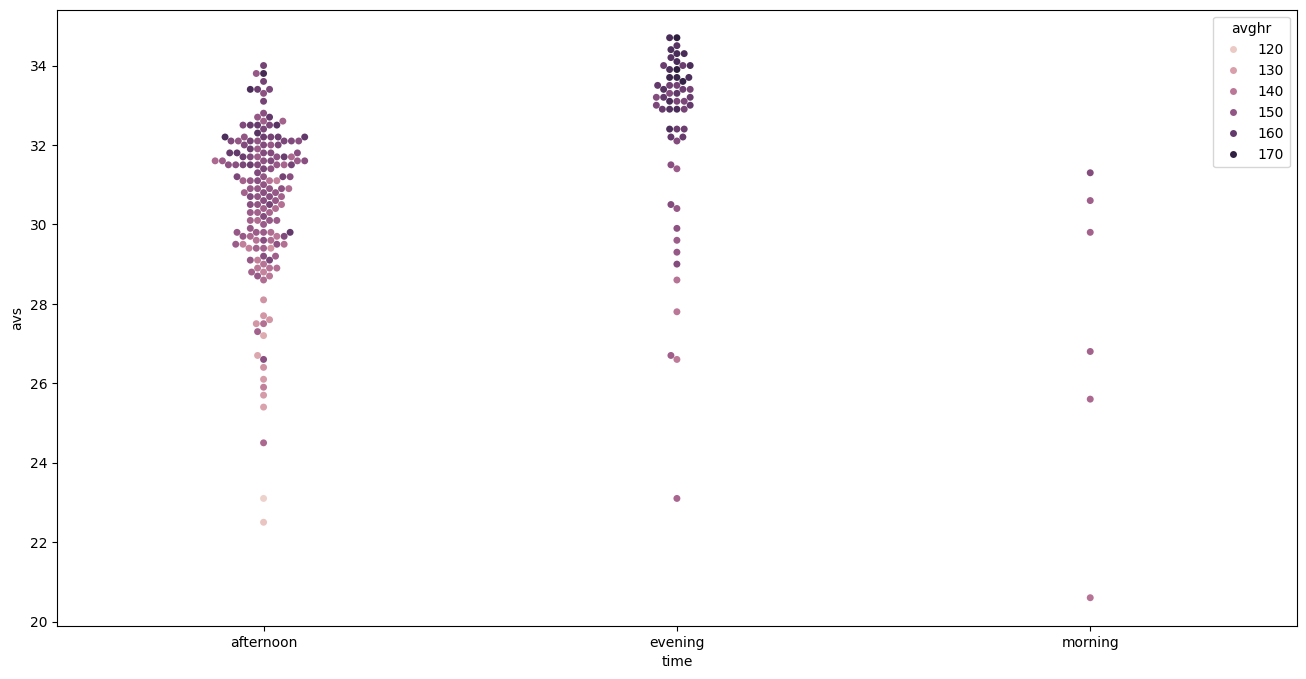

In [24]:
plt.figure(figsize=(16, 8))
sns.swarmplot(data=new_df, hue="avghr", x="time", y="avs")